<a href="https://colab.research.google.com/github/Gavin-Moss/Python-for-Math/blob/main/Exploration_2_Newtons_Method.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
from matplotlib import pyplot as plt
from PIL import Image

The effect of Newton's Method on a linear equation is trivial, so let's start our exporation with its effect on quadratics.

Real line, quadratic:

In [2]:
# A function that takes in the coefficients of a polynomial and an x value, then returns a y value
def poly_point(poly_coeffs, x):
  degree = len(poly_coeffs) - 1
  result = 0
  for i in range(degree + 1):
    result += poly_coeffs[i] * x ** (degree - i)
  return result

# A function that takes in the coefficients of a polynomial and an x value, then returns its derivative at that value
def poly_dev(poly_coeffs, x):
  new_coeffs = np.arange(len(poly_coeffs))[:0:-1] * np.array(poly_coeffs)[:-1]
  return poly_point(new_coeffs, x)

In [3]:
# A function that does Newton's Method
def poly_newton(poly_coeffs, x, precision=10):
  x0, x1 = x, x + 1
  error = 10 ** -(precision + 2)
  c = 0
  while abs(x0 - x1) > error and c != 200:
    x0, x1 = x1, x0 - poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)
    c += 1
  if c == 200:
    return np.pi
  return round(x1, precision)

In [4]:
# A function that takes in n, then returns the RGB values of n "evenly spaced" colors
def evenly_spaced_colors(n):
  colors = np.zeros([n+1, 3], dtype='uint8')
  x_values = np.linspace(0, 1535, n+1, dtype='int')
  for i in range(n+1):
    if x_values[i] in range(0, 256):
      colors[i] = [255, x_values[i], 0]
    elif x_values[i] in range(256, 512):
      colors[i] = [-1-x_values[i], 255, 0]
    elif x_values[i] in range(512, 768):
      colors[i] = [0, 255, x_values[i]]
    elif x_values[i] in range(768, 1024):
      colors[i] = [0, -1-x_values[i], 255]
    elif x_values[i] in range(1024, 1280):
      colors[i] = [x_values[i], 0, 255]
    elif x_values[i] in range(1280, 1536):
      colors[i] = [255, 0, -1-x_values[i]]
  return colors[:-1]

In [ ]:
poly_newton([1, 0, -2], 1.5, 200)

In [ ]:
poly_newtonCount([1, 0, -2], 1.5, 250)

In [ ]:
poly_newton([1,3,-11,12],1000)

In [ ]:
def draw_1D_poly_NM(poly_coeffs, x_int, x_fin, res=500, height=100):
  x_destinations = np.zeros(res)
  x_values = np.linspace(x_int, x_fin, res)
  for i in range(res):
    x_destinations[i] = poly_newton(poly_coeffs, x_values[i], 8)
  bins = []
  for i in range(res):
    if x_destinations[i] not in bins:
      bins.append(x_destinations[i])
  if np.pi in bins:
    colors = evenly_spaced_colors(len(bins) - 1)
    bins.remove(np.pi)
  else:
    colors = evenly_spaced_colors(len(bins))
  print(bins)
  print(colors)
  colors_dict = {}
  for i in range(len(bins)):
    colors_dict[bins[i]] = colors[i]
  print(colors_dict)
  img_arr = np.zeros([height, res, 3], dtype='uint8')
  for i in range(res):
    if x_destinations[i] != np.pi:
      img_arr[:, i] = colors_dict[x_destinations[i]]
  img = Image.fromarray(img_arr)
  display(img)

In [ ]:
draw_1D_poly_NM([-0.3, -0.9, 0.9, 2.5, -2.1, -1.2, 0.5], -3, 2, res=2000, height=300)

NOTES FOR ME:


*  going to try to visualize the rate of converge of newtons method using matplotlib
*  newton's method is an algorithm which estimates the root of polynomials

In [5]:
# A function that counts how many times it iterates
def poly_newtonCount(poly_coeffs, x, precision=10):
  x0, x1 = x, x + 1
  error = 10 ** -(precision + 2)
  c = 0
  while abs(x0 - x1) > error and c != 200:
    x0, x1 = x1, x0 - poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)
    c += 1
  if c == 200:
    return np.pi
  return c

In [6]:
def GraphRateOfConvergence(poly_coeffs, x):
  #lets make a line plot to show rate of convergence?
  #This line plot start at x=0 as our highest point, and then approach 0, as our iterations increase, as our approximation
  #gets closer to the real root

  root = poly_newton([1, 0, -2], 1.5, 100) #this is the root with precision to 100 digits
  #error = abs((SOMETHING) - root) this something should be xn+1 everytime we iterate newtons method, but im not sure how to get that

  iterations = np.arange(0,poly_newtonCount(poly_coeffs,x,1000)) #counts the iterations
#NOTE, either i'm misunderstanding the count or our code is very efficient, cuz it seems like it always iterates 10 times 
#in this example, even with really high precision

  test = np.linspace(0,poly_newton(poly_coeffs,x),10) #???

  plt.figure()
  plt.plot(iterations, test, alpha = 0.5, c = 'blue')
  plt.title('Rate Of Convergence of Newtons Method')
  plt.xlabel('Iterations')
  plt.ylabel('Error') #as of right now, the y axis is definitely not the error.

In [ ]:
GraphRateOfConvergence([1, 0, -2], 1.5)

Wednesday Night: \\
Right now the problem is that I need to get the values xn+1 (the new approximation after each iteration) so that I can find the error after each iteration then graph it.  \\
I don't see a way to get the value of each iteration, so maybe i can make a new function?

In [8]:
def test_poly_newton(poly_coeffs, x, precision=10):
  x0, x1 = x, x + 1
  error = 10 ** -(precision + 2)
  c = 0
  while abs(x0 - x1) > error and c != 200:
    x0, x1 = x1, x0 - poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)
    print(x0)
    c += 1
  if c == 200:
    return np.pi
  return round(x1, precision)

In [ ]:
test_poly_newton([1,0,-2] ,1.5)

it seems that this prints every value after an iteration, but obvioulsy this just prints, i need a way to call the actual value.
  
I feel like recursion could work ??? but we haven't learned that and i'd be very out of practice.

I'll try a function that does the iteration only once.

In [10]:
def OneIteration(poly_coeffs, x, precision=10):
  if poly_dev(poly_coeffs,x) == 0:
    raise ValueError('Out of Basin')
  x0, x1 = x, x + 1
  error = 10 ** -(precision + 2)

  x0, x1 = x1, x0 - poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)
  return round(x1, precision)

In [ ]:
OneIteration([1,0,-2] ,1.5)

In [ ]:
OneIteration([1,0,-2], OneIteration([1,0,-2] , 1.5))

In [ ]:
#I'll try to make a 1D numpy array of each iteration
AllEstimates = np.linspace(1.5,poly_newton([1,0,-2] ,1.5),10 ) #starts at 1.5 cuz thats our first guess
print(AllEstimates)

for i in range(len(AllEstimates)-1):
  AllEstimates[i+1] = OneIteration([1,0,-2], AllEstimates[i]) # this array should be the array of each iteration
  #til we converged to the root
print(AllEstimates)

#now lets try to make it a plot
iterations = np.arange(0,poly_newtonCount([1,0,-2],1.5,1000))
plt.figure()
plt.plot(iterations, AllEstimates, alpha = 0.5, c = 'blue')
plt.title('Rate Of Convergence of Newtons Method')
plt.xlabel('Iterations')
plt.ylabel('Approximation of root')
#well the graph... works! but since our guess is kind of far off it's hard to see anything
#but you can see that the first iteration works very well, then the 2nd optimizes it,
#then after the 2nd, its practically correct.

In [21]:
#The above code has some noticable flaws, but it works. 
#I'll try to create a function that takes actual inputs, since the above code only uses one example.
def GraphRateOfConvergence2(poly_coeffs,x):
  root = poly_newton(poly_coeffs, x, 100) #this is the root with precision to 100 digits
  #error = abs((SOMETHING) - root) this something should be xn+1 everytime we iterate newtons method, but im not sure how to get that

  iterations = np.linspace(0,10,poly_newtonCount(poly_coeffs,x,10)) #counts the iterations

  Approximations = np.linspace(x, root, poly_newtonCount(poly_coeffs,x))
  for i in range(len(Approximations)-1):
    Approximations[i+1] = OneIteration(poly_coeffs, Approximations[i])

  plt.figure()
  plt.plot(iterations, Approximations, alpha = 0.5, c = 'blue')
  plt.title('Rate Of Convergence of Newtons Method')
  plt.xlabel('Iterations')
  plt.ylabel('Approximations')

  Error = Approximations
  for j in range(len(Approximations)):
    Error[j] = abs(root - Approximations[j])
    Approximations[j] = Error[j]
  #plt.plot(iterations,Error)

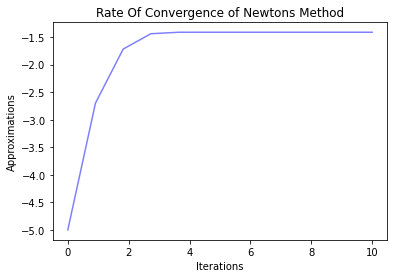

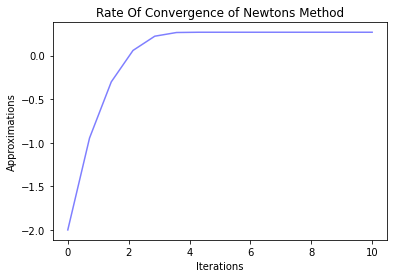

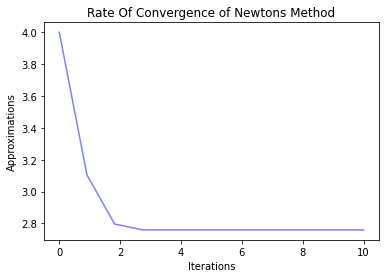

In [32]:
GraphRateOfConvergence2([1,0,-2],-5)
#I have a problem that my array for the iterations is not always the same lengths
#as the arrays for the approximations
#ACTUALLY I THINK I DID IT i changed iterations to be of linspace instead of arange

#this graph shows, with an initial guess of -5, newton's method converging
#to the root of x^2 - 2 = 0 (the root closer to the guess)
#the blue is the error, and the purple are the actual approximations, but they seem to be same graph
#just shifted vertically by the value of the root

GraphRateOfConvergence2([1,-5,5,-1],-2) #error ???

GraphRateOfConvergence2([1,0,0,-21],4) #x^3 - 21 = 0, with a guess of 4

Below is jesse's code that has an updated polynewton method, it also takes the number of steps as input rather than precision. I'll need to look over my code to so that it all works with this updated function. I imagine ill need to change my count function for sure, and probably my oneiteration function as well.


In [46]:
# A function that takes in the coefficients of a polynomial, an x value, and a number of steps, then applies Newton's Method for the amount of steps or until terminal behaivor is reached (to 15 digits of precision)
def UPDATEDpoly_newton(poly_coeffs, x, steps=100):
  x0 = x
  x_list = []
  for i in range(steps):
    x0 -= poly_point(poly_coeffs, x0) / poly_dev(poly_coeffs, x0)  # Newton's Method: x1 = x0 - f(x0) / f'(x0)
    if x0 in x_list:  # If x0 ever becomes what it was before (to 15 digits of precision), then it will begin repeating itself and more calculations are not needed
      return x0
    x_list.append(x0)  # Adds each x0 to a list
  return x0  # If all of the steps are completed without a repeat x0 being found, returns last x0

In [47]:
def UPDATEDOneIteration(poly_coeffs, x):
  if poly_dev(poly_coeffs,x) == 0:
    raise ValueError('Out of Basin')
  return UPDATEDpoly_newton(poly_coeffs,x,1)

In [60]:
def FINALGraphRateOfConvergence(poly_coeffs,x,steps = 10):
  root = UPDATEDpoly_newton(poly_coeffs, x, 100) #this is the root with precision to 100 digits

  iterations = np.linspace(0,10,steps) #counts the iterations

  Approximations = np.linspace(x, root, steps)
  for i in range(len(Approximations)-1):
    Approximations[i+1] = UPDATEDOneIteration(poly_coeffs, Approximations[i])

  plt.figure()
  plt.plot(iterations, Approximations, alpha = 0.5, c = 'blue')
  plt.title('Rate Of Convergence of Newtons Method')
  plt.xlabel('Iterations')
  plt.ylabel('Approximations')


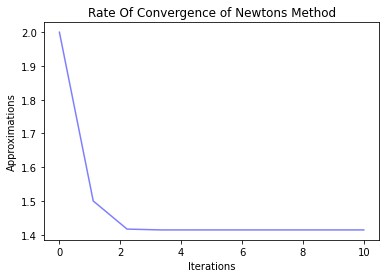

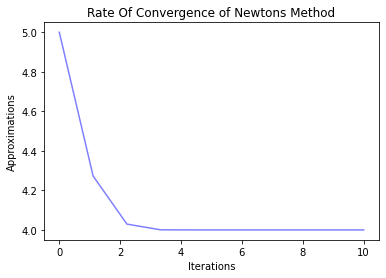

In [62]:
FINALGraphRateOfConvergence([1,0,-2],2)
FINALGraphRateOfConvergence([1,-2,-11,12],5)